In [82]:
# Week 3-Lab1. Data Preprocessing-I

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#load data set
df=pd.read_csv("movie (2).csv")
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [11]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [10]:
#checking data types
data_types=df.dtypes
print(data_types)

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object


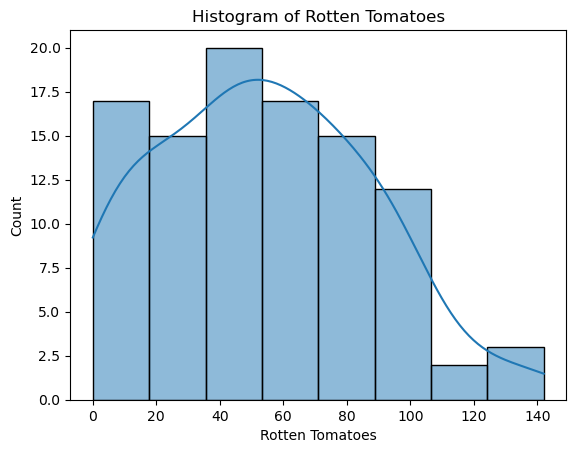

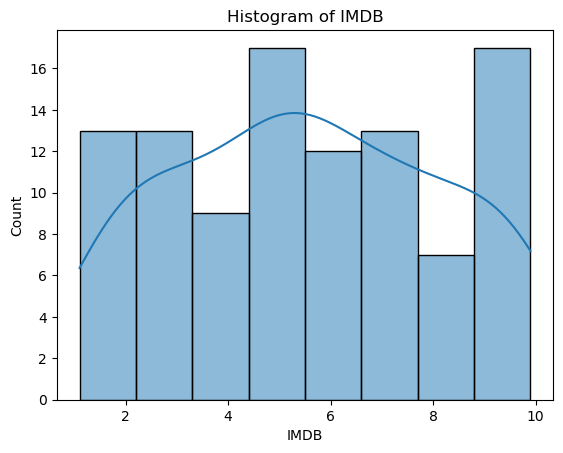

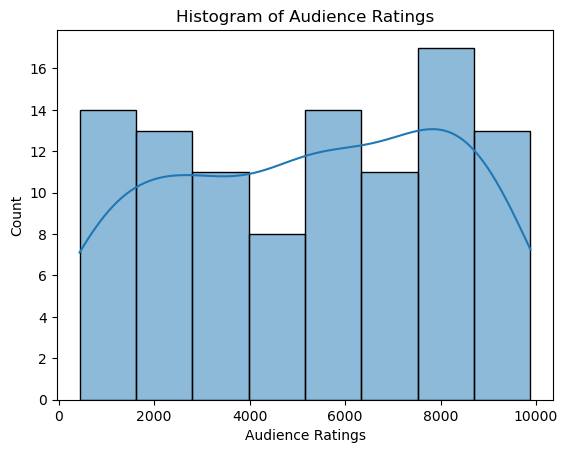

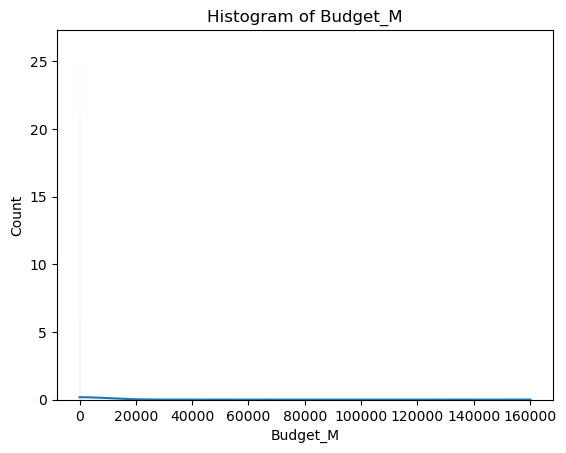

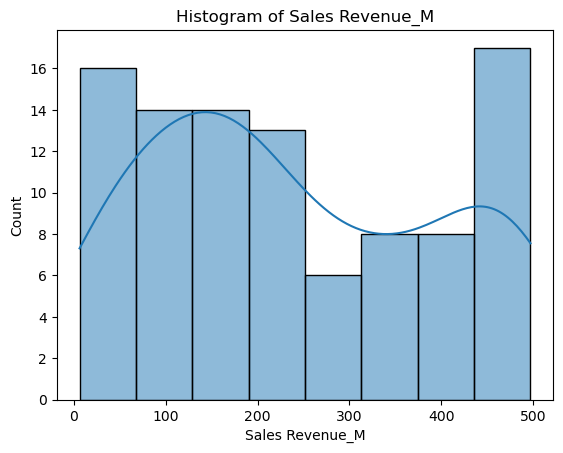

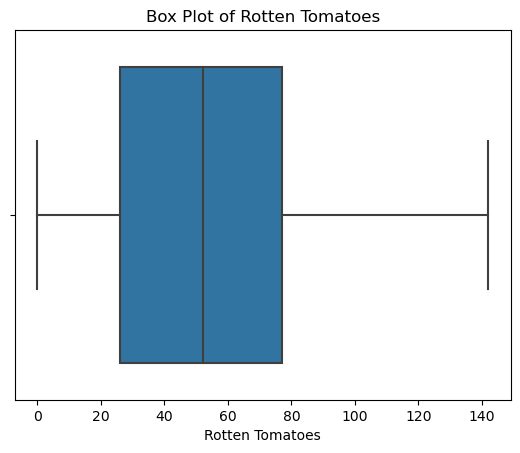

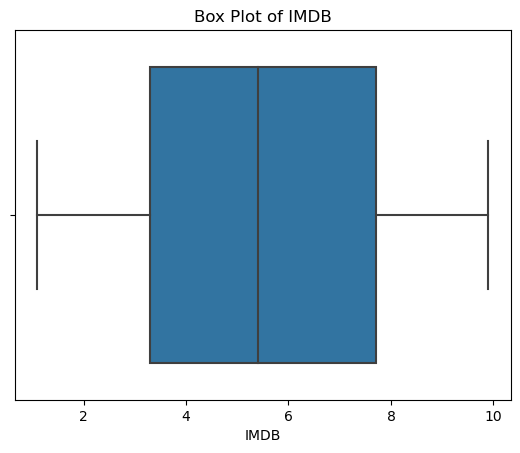

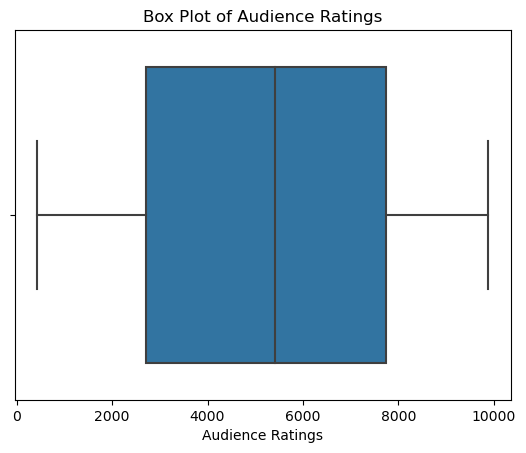

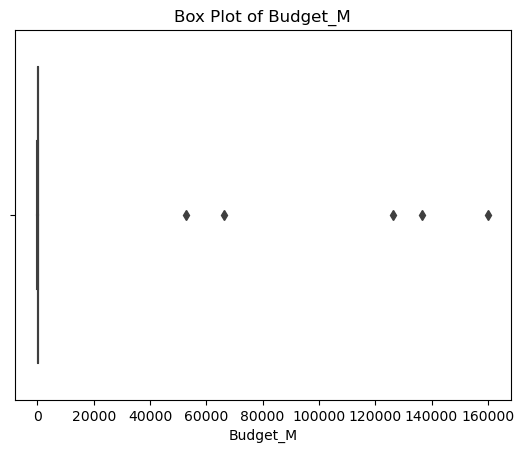

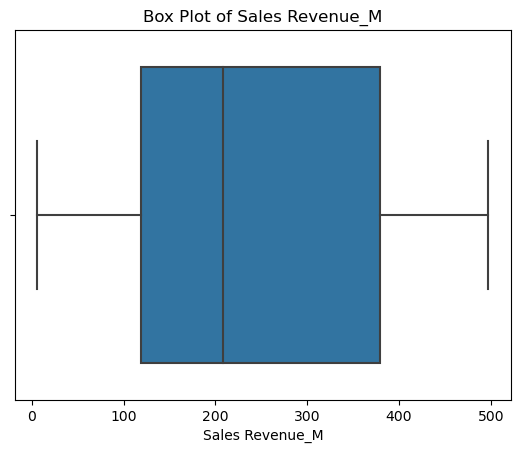

In [18]:
# Histogram 

for col in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram of {col}")
  plt.show()

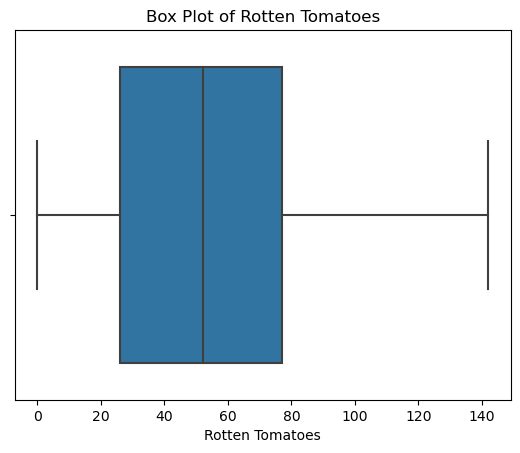

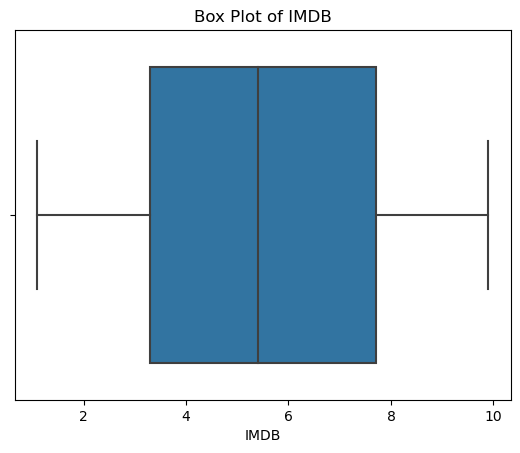

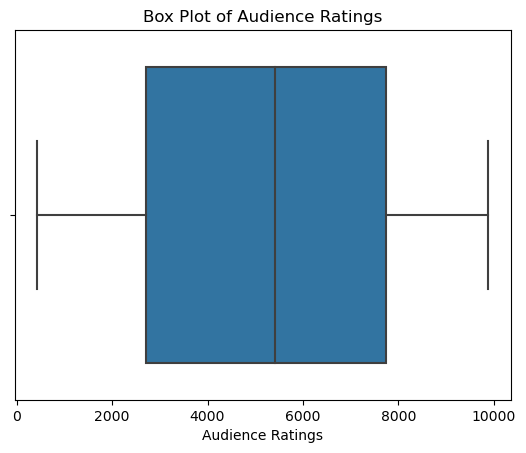

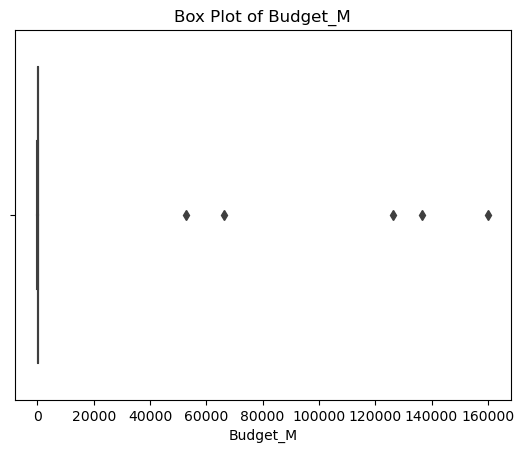

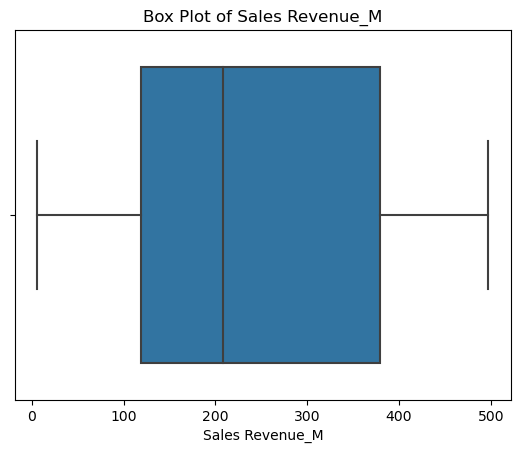

In [21]:
#box plot
for col in df.select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show()


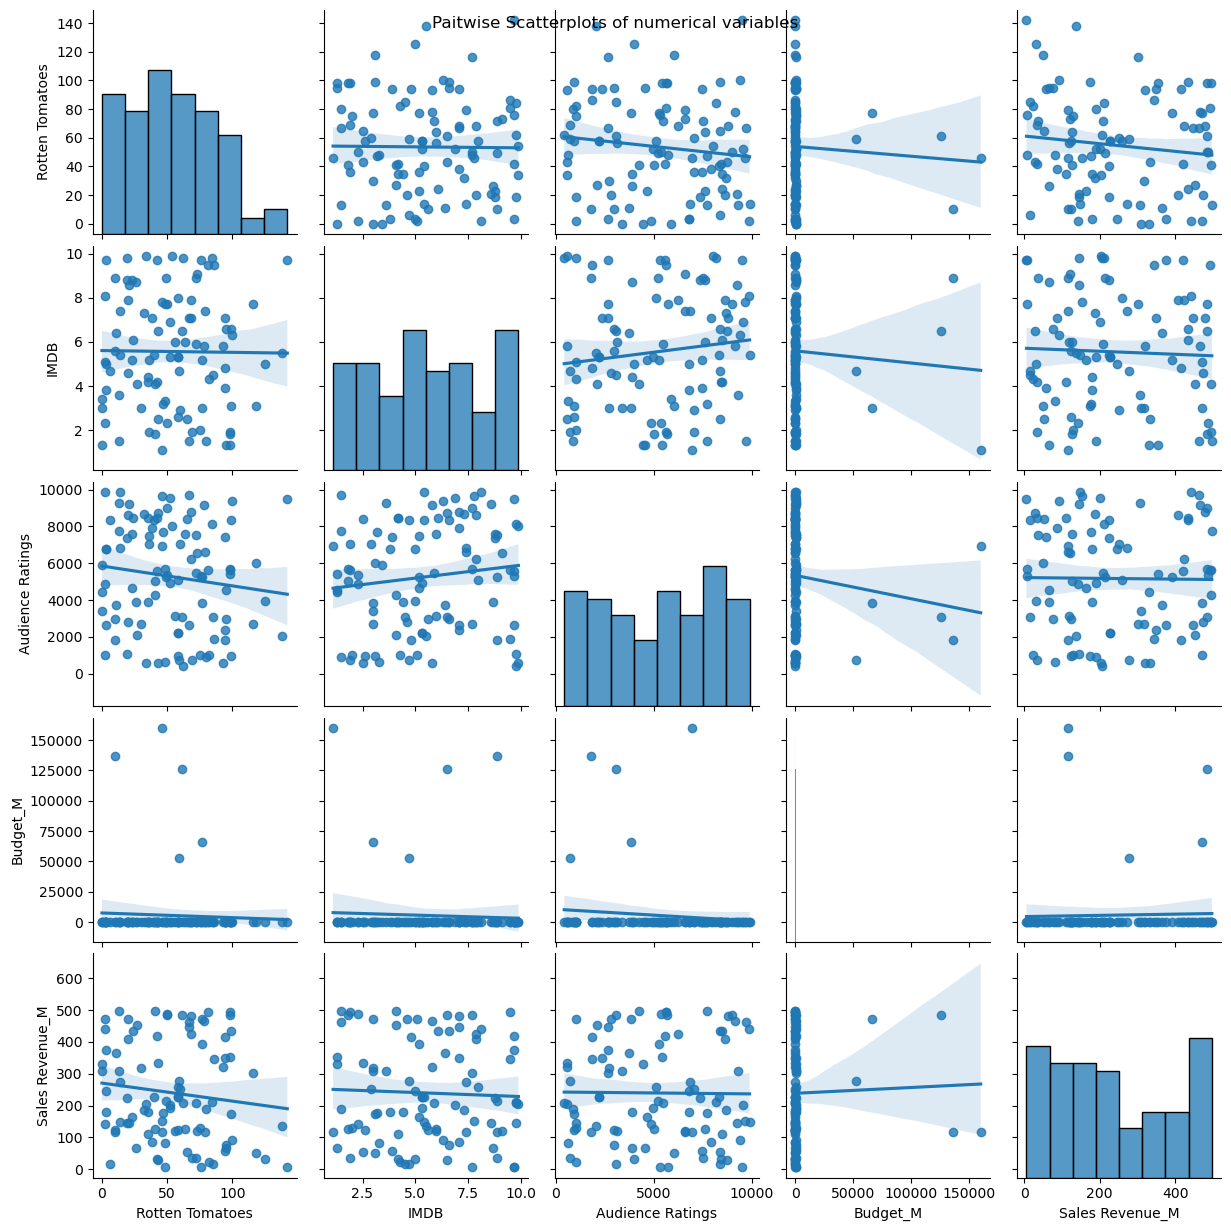

In [22]:
#scatter plot
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle("Paitwise Scatterplots of numerical variables")
plt.show()

In [23]:
correlation_matrix=df.corr()
correlation_matrix

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
Rotten Tomatoes,1.000000,-0.010546,-0.126204,-0.051246,-0.122929
IMDB,-0.010546,1.000000,0.126555,-0.053704,-0.041741
Audience Ratings,-0.126204,0.126555,1.000000,-0.111453,-0.011118
Budget_M,-0.051246,-0.053704,-0.111453,1.000000,0.030309
Sales Revenue_M,-0.122929,-0.041741,-0.011118,0.030309,1.000000


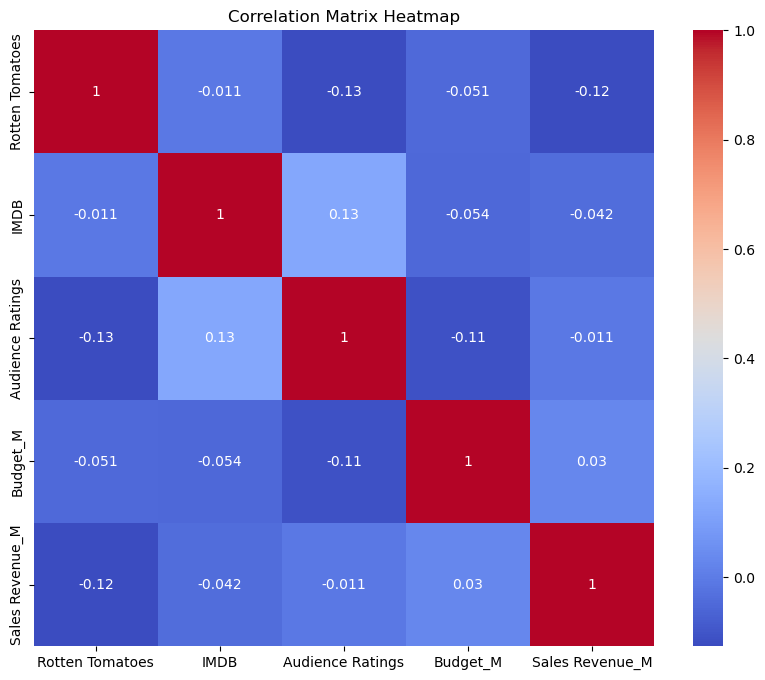

In [24]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#1. imputation techniques 

In [25]:
# Display columns with missing values
print("Columns with Missing Values:")
print(df.isnull().sum())


Columns with Missing Values:
Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


In [42]:
df['Genre']= df['Genre'].replace('Scifi','Scifi')
print(df['Genre'].unique())

['Horror' 'Romance' 'SciFi' 'Action' 'Thriller' 'Comedy' 'Sci-Fi' 'Drama'
 'Documentary']


In [48]:
print(df['Year of Release'].unique())

['2020' '2013' '2017' '2019' '2012' '2006' '2015' '2005' 'Year 2004'
 '1998' '2000' '2010' '2008' '1988' '2004' '2022' 'Year 2008' '1983'
 '1999' '1980' '1990' '1986' '2007' '2014' '2018' 'Year 2023' '2016'
 '2021' '1982' '1992' '1995' '2003' '1985' '1981' '1991' '2001'
 'Year 1982' '2009' '1989' '2023' 'Year 2001' '1993' '2011' '1996' '2002']


In [50]:
print(df['Sales Revenue_M'].unique())

[0.0490758  0.30027402 0.20212722 0.48012798 0.02119301 0.51578676
 0.26215755 0.26293341 0.00435034 0.15046829 0.28800342 0.50648413
 0.08194713 0.51152894 0.4870198  0.31598317 0.24519403 0.18454531
 0.39085667 0.02096856 0.00362078 0.30279664 0.05399203 0.19762226
 0.17646846 0.19846092 0.10828023 0.         0.09542061 0.3925671
 0.52048353        nan 0.29224317 0.13357879 0.40109668 0.33408594
 0.52508565 0.05145821 0.45707186 0.22145698 0.19050125 0.41085673
 0.1936583  0.41221667 0.34711656 0.36450268 0.22059861 0.42836194
 0.29537241 0.2651516  0.47313345 0.50510977 0.03343135 0.18446434
 0.25816407 0.46836251 0.5239011  0.51886516 0.49868159 0.22662039
 0.52587002 0.19592641 0.08733406 0.18501236 0.42177707 0.04504391
 0.43762965 0.4910831  0.21117762 0.2756919  0.2730056  0.14039893
 0.31348286 0.23157157 0.47676386 0.18798629 0.33996778 0.51067728
 0.39910932 0.48628463 0.50993184 0.44516805 0.42563275 0.51855623
 0.52658903 0.31478345 0.05653616 0.22424656 0.12532271 0.29678

In [78]:
column = 'Sales Revenue_M'
mean = df[column].mean()
print(f'The mean of {column} is: {mean}')


The mean of Sales Revenue_M is: 0.298872867168018


In [80]:
duplicates = df.duplicated().sum()
print(f'The mean of {column} is: {mean}')

The mean of Sales Revenue_M is: 0.298872867168018


In [77]:
df = df.drop_duplicates()
df

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release,Profit Margin (%)
0,Horror,125,5.0,3968,0.000444,0.049076,2020,99.095723
1,Romance,84,9.8,8150,0.000156,0.300274,2013,99.948079
2,SciFi,75,2.0,1040,0.001007,0.202127,2017,99.501644
3,Action,68,7.9,6250,0.000222,0.480128,2019,99.953826
4,Thriller,6,4.7,8356,0.000621,0.021193,2012,97.069156
...,...,...,...,...,...,...,...,...
95,Action,116,7.7,2679,0.001115,0.386416,2006,99.711432
96,SciFi,52,5.3,4950,0.000999,0.277797,2019,99.640341
97,Thriller,67,7.1,2665,0.000184,0.495572,2002,99.962896
98,Sci-Fi,61,6.5,3057,0.787653,0.518504,1999,-51.908930


In [81]:
var = df.describe()
print(var.loc['std'])

#the variance for sales revenue increased after taking care of the 5 null values from 156.248835 to 157.072535

Rotten Tomatoes        34.119226
IMDB                    2.595039
Audience Ratings     2926.300278
Budget_M                0.163164
Sales Revenue_M         0.161598
Profit Margin (%)            NaN
Name: std, dtype: float64


In [88]:
#2. encoding categorical varibales 
movie_df = pd.read_csv("movie (2).csv")  # Replace with your actual file path

# Assuming 'Genre' is the categorical variable to be encoded
movie_encoded = pd.get_dummies(movie_df, columns=['Genre'])
print(movie_encoded)

     Rotten Tomatoes  IMDB  Audience Ratings       Budget_M  Sales Revenue_M  \
0                125   5.0              3968      74.348337        31.356476   
1                 84   9.8              8150      28.243154       212.016126   
2                 75   2.0              1040     164.601429       129.342033   
3                 68   7.9              6250      38.779734       424.519154   
4                  6   4.7              8356     102.752477        16.652313   
..               ...   ...               ...            ...              ...   
96                52   5.3              4950     163.289240       191.404030   
97                67   7.1              2665      32.723478       447.692942   
98                61   6.5              3057  126150.789400       483.897336   
99                14   7.4              6838      80.288417       273.442451   
100               58   5.3              2195      47.214594       227.081198   

    Year of Release  Genre_Action  Genr

In [90]:
df_encoded = pd.get_dummies(df, columns=['Genre'], prefix='Genre')
print(df_encoded)
# i would use one hot encoding  because its Suitable for nominal categorical variables

    Rotten Tomatoes  IMDB  Audience Ratings  Budget_M  Sales Revenue_M  \
0               125   5.0              3968  0.000444         0.049076   
1                84   9.8              8150  0.000156         0.300274   
2                75   2.0              1040  0.001007         0.202127   
3                68   7.9              6250  0.000222         0.480128   
4                 6   4.7              8356  0.000621         0.021193   
..              ...   ...               ...       ...              ...   
95              116   7.7              2679  0.001115         0.386416   
96               52   5.3              4950  0.000999         0.277797   
97               67   7.1              2665  0.000184         0.495572   
98               61   6.5              3057  0.787653         0.518504   
99               14   7.4              6838  0.000481         0.360933   

   Year of Release  Profit Margin (%)  Genre_Action  Genre_Comedy  \
0             2020          99.095723     

In [35]:
#3. Data trandformation method: (MIN-MAX)

from sklearn.preprocessing import MinMaxScaler

# Assuming 'Budget_M' and 'Sales Revenue_M' are numerical columns
numerical_columns = ['Budget_M', 'Sales Revenue_M']

# Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the dataset after Min-Max Scaling
print("\nDataset after Min-Max Scaling:")
print(df.head())

#helps with dealing with feautres on different scales



Dataset after Min-Max Scaling:
      Genre  Rotten Tomatoes  IMDB  Audience Ratings  Budget_M  \
0    Horror              125   5.0              3968  0.000444   
1   Romance               84   9.8              8150  0.000156   
2     SciFi               75   2.0              1040  0.001007   
3    Action               68   7.9              6250  0.000222   
4  Thriller                6   4.7              8356  0.000621   

   Sales Revenue_M Year of Release  
0         0.051586            2020  
1         0.419392            2013  
2         0.251076            2017  
3         0.852028            2019  
4         0.021650            2012  


In [91]:
df['Budget_Binned'] = pd.cut(df['Budget_M'], bins=[0, 50, 100, 150, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
#converts categorical  data into a suitable format for ML Algorithms

C:\Users\rando\AppData\Local\Temp\ipykernel_22320\1857319932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget_Binned'] = pd.cut(df['Budget_M'], bins=[0, 50, 100, 150, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])


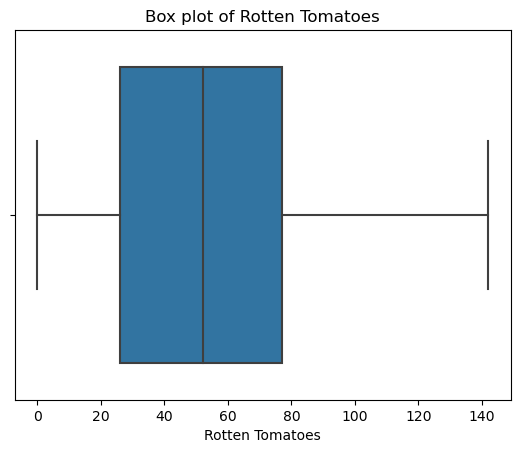

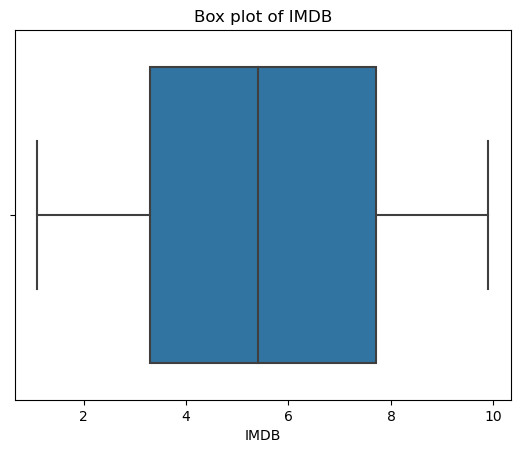

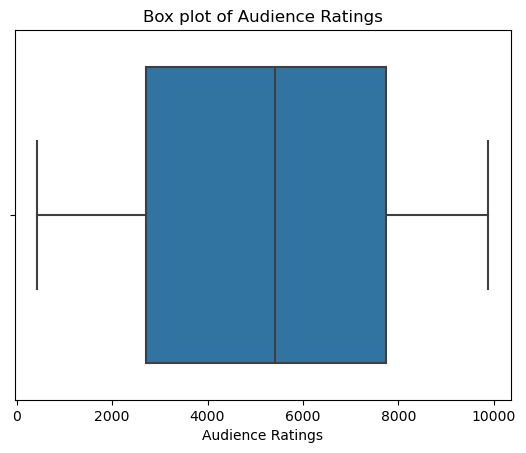

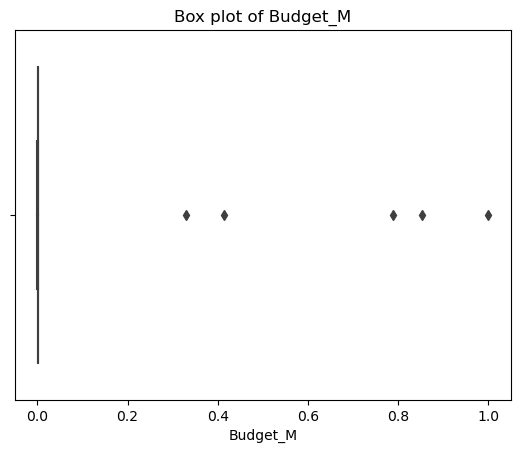

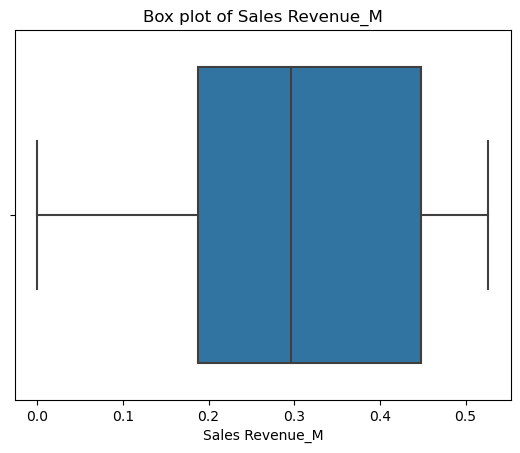

In [57]:
#4. Identify outliers 
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()
    
    #using  a box plot to help see outliers 
    
    


In [92]:
#outlier z score method shows hown many std the data point is away from mean
from scipy import stats

z_scores = np.abs(stats.zscore(df['Sales Revenue_M']))
outliers = (z_scores > 3)


In [58]:
#5. handling missing values 
missing = df.isnull().sum()
print(missing)

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


In [62]:
# Drop rows with missing values in 'Sales Revenue_M'
df.dropna(subset=['Sales Revenue_M'], inplace=True)

In [63]:
missing = df.isnull().sum()
print(missing)

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


In [66]:
#calculate profit margin
df['Profit Margin (%)'] = ((df['Sales Revenue_M'] - df['Budget_M']) / df['Sales Revenue_M']) * 100

print(df)

        Genre  Rotten Tomatoes  IMDB  Audience Ratings  Budget_M  \
0      Horror              125   5.0              3968  0.000444   
1     Romance               84   9.8              8150  0.000156   
2       SciFi               75   2.0              1040  0.001007   
3      Action               68   7.9              6250  0.000222   
4    Thriller                6   4.7              8356  0.000621   
..        ...              ...   ...               ...       ...   
96      SciFi               52   5.3              4950  0.000999   
97   Thriller               67   7.1              2665  0.000184   
98     Sci-Fi               61   6.5              3057  0.787653   
99     Horror               14   7.4              6838  0.000481   
100    Action               58   5.3              2195  0.000274   

     Sales Revenue_M Year of Release  Profit Margin (%)  
0           0.049076            2020          99.095723  
1           0.300274            2013          99.948079  
2        